In [1]:
# Importing the standard ML Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
weather = pd.read_csv("weather.csv")

In [3]:
# Checking the dataset for information
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
# Finding categorical features which are non-numeric (neither float64 nor int64)
categ_features = [col for col in weather.columns if weather[col].dtype == 'O']
print("Number of Categorical Features : {}".format(len(categ_features)))
print("Categorical Features : ",categ_features)

Number of Categorical Features : 5
Categorical Features :  ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [5]:
# Finding numerical features which are either float64 or int64
num_features = [col for col in weather.columns if weather[col].dtype != 'O']
print("Number of Numerical Features : {}".format(len(num_features)))
print("Numerical Features : ",num_features)

Number of Numerical Features : 17
Numerical Features :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [6]:
# Finding the number of unique values in the categorical data for further use
for x in categ_features:
    val = len(weather[x].unique())
    print("No. of Unique Values of {} are : {}".format(x,val))

No. of Unique Values of WindGustDir are : 17
No. of Unique Values of WindDir9am are : 17
No. of Unique Values of WindDir3pm are : 17
No. of Unique Values of RainToday are : 2
No. of Unique Values of RainTomorrow are : 2


In [7]:
# Finding number of null values in categorical values set
categ_features = [col for col in weather.columns if weather[col].dtype == 'O']
weather[categ_features].isnull().sum()

WindGustDir      3
WindDir9am      31
WindDir3pm       1
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
# Filling categorical values with their respective mode
categ_null = [ft for ft in categ_features if weather[ft].isnull().sum()]
for x in categ_null:
    mode_val = weather[x].mode()[0]
    weather[x].fillna(mode_val , inplace = True)

In [9]:
# Filling numerical values with their respective mode
num_null = [ft for ft in num_features if weather[ft].isnull().sum()]
for x in num_null:
    mode_val = weather[x].mode()[0]
    weather[x].fillna(mode_val , inplace = True)

<AxesSubplot: >

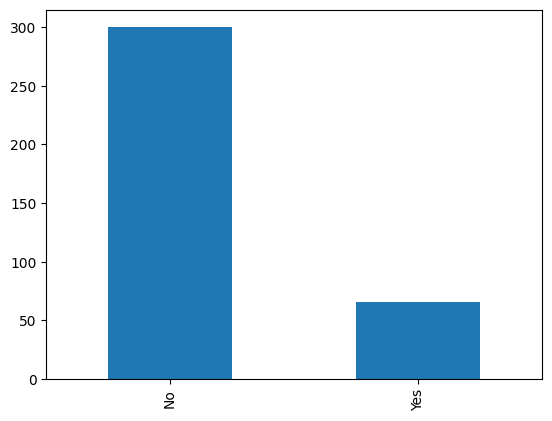

In [10]:
weather["RainToday"].value_counts().plot(kind = 'bar')

In [11]:
# sns.lineplot(data = weather , x = "Rainfall" , y = "MaxTemp" , color = 'green')

In [12]:
# This function is used to convert values into numeric types for easier handling
def util(name):
    map_dict = {}
    unique = list(weather[name].unique())
    for idx in range(len(unique)):
        map_dict[unique[idx]] = idx
        
    return map_dict

In [13]:
weather["RainToday"].replace({'No':0 ,'Yes':1} , inplace = True)
weather["RainTomorrow"].replace({'No':0 ,'Yes':1} , inplace = True)
weather["WindGustDir"].replace(util('WindGustDir') , inplace = True)
weather["WindDir9am"].replace(util('WindDir9am') , inplace = True)
weather["WindDir3pm"].replace(util('WindDir3pm') , inplace = True)

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    int64  
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     366 non-null    int64  
 8   WindDir3pm     366 non-null    int64  
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [15]:
X = weather.drop(["RainTomorrow"] , axis = 1)
Y = weather["RainTomorrow"]

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
et_m = ExtraTreesRegressor()
et_m.fit(X,Y)
et_m.feature_importances_

array([3.06630596e-03, 4.11118660e-03, 1.49068904e-03, 3.66771265e-03,
       1.44454040e-02, 3.38443965e-03, 5.50476793e-03, 1.94905379e-03,
       3.07588113e-03, 3.68620518e-03, 2.19609987e-03, 4.02856194e-03,
       2.91699919e-02, 6.28690573e-03, 3.09153361e-02, 2.10126343e-03,
       3.54808854e-02, 3.39334469e-03, 4.24771596e-03, 8.30084394e-04,
       8.36968165e-01])

<AxesSubplot: >

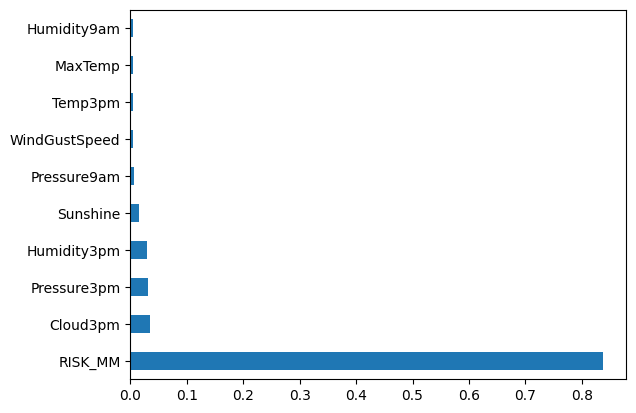

In [17]:
ft_imp = pd.Series(et_m.feature_importances_ , index = X.columns)
ft_imp.nlargest(10).plot(kind = 'barh')

In [18]:
from sklearn.model_selection import train_test_split as TTS
X_train , X_test , Y_train , Y_test = TTS(X,Y,test_size=0.2,random_state=0)

In [19]:
print("TRAINING DATA : {}".format(len(X_train)))
print("TESTING DATA : {}".format(len(X_test)))

TRAINING DATA : 292
TESTING DATA : 74


In [20]:
from sklearn.preprocessing import StandardScaler as SS
sca = SS()
X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression as LoR
# from sklearn.ensemble import RandomForestClassifier as RFC
# from sklearn.linear_model import SGDClassifier as SGD
# from sklearn.tree import DecisionTreeClassifier as DTC
# from sklearn.naive_bayes import GaussianNB as GNB
# from sklearn.neighbors import KNeighborsClassifier as KNN
model = LoR()
model.fit(X_train , Y_train)

LogisticRegression()

In [22]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print("ACCURACY SCORE :{}".format(accuracy_score(Y_test , Y_pred)))

ACCURACY SCORE :0.9864864864864865


In [24]:
print("TRAINING DATA SCORE : {}".format(model.score(X_train , Y_train)))
print("TESTING DATA SCORE : {}".format(model.score(X_test , Y_test)))

TRAINING DATA SCORE : 0.9828767123287672
TESTING DATA SCORE : 0.9864864864864865


In [25]:
import pickle
with open('scaler.pkl' , 'wb') as file:
    pickle.dump(SS , file)

In [26]:
with open('logreg.pkl' , 'wb') as file:
    pickle.dump(model , file)